In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as pyplot
%matplotlib inline

In [10]:
filename = 'mental_health_data.csv'
data = pd.read_csv(filename)

In [13]:
#look at first few rows of data
data.head(10)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
5,0,More than 1000,1.0,NaN,Yes,I am not sure,No,Yes,Yes,Somewhat easy,...,Not applicable to me,Often,42,Male,United Kingdom,NaN,United Kingdom,NaN,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes
6,0,26-100,1.0,NaN,I don't know,No,No,No,I don't know,Somewhat easy,...,Not applicable to me,Not applicable to me,30,M,United States of America,Tennessee,United States of America,Tennessee,Back-end Developer,Sometimes
7,0,More than 1000,1.0,NaN,Yes,Yes,No,Yes,Yes,Very easy,...,Sometimes,Often,37,female,United States of America,Virginia,United States of America,Virginia,Dev Evangelist/Advocate|Back-end Developer,Always
8,0,26-100,0.0,1.0,I don't know,No,No,No,I don't know,Very difficult,...,Rarely,Often,44,Female,United States of America,California,United States of America,California,Support|Back-end Developer|One-person shop,Sometimes
9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Rarely,Often,30,Male,United States of America,Kentucky,United States of America,Kentucky,One-person shop|Front-end Developer|Back-end D...,Always


In [14]:
#get dataframe shape
data.shape

(1433, 63)

In [31]:
#Lets look at the column datatypes
data_types = data.dtypes

In [33]:
data_types.value_counts()

object     56
int64       4
float64     3
dtype: int64

In [16]:
#pick out which columns are numerical and see some simple statistics on those columns
data.describe()

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


Clearly all columns above are binary responses (1 for yes 0 for no) except the age column. I think all of these will be valuable in an unsupervised ML model

In [21]:
#get column names to make life easier (will want to code these for future programming)
data.columns

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that dis

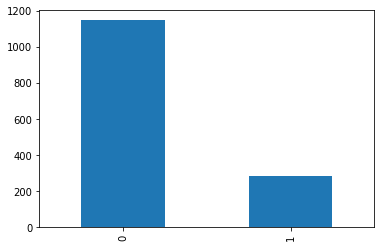

In [24]:
data['Are you self-employed?'].value_counts().plot(kind='bar')

1.0    883
0.0    263
Name: Is your employer primarily a tech company/organization?, dtype: int64


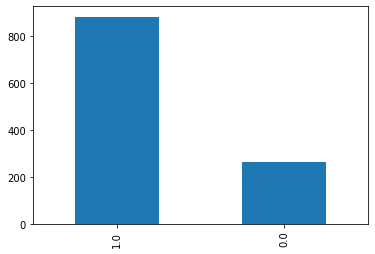

In [26]:
data['Is your employer primarily a tech company/organization?'].value_counts().plot(kind='bar')
print(data['Is your employer primarily a tech company/organization?'].value_counts())

26-100            292
More than 1000    256
100-500           248
6-25              210
500-1000           80
1-5                60
Name: How many employees does your company or organization have?, dtype: int64


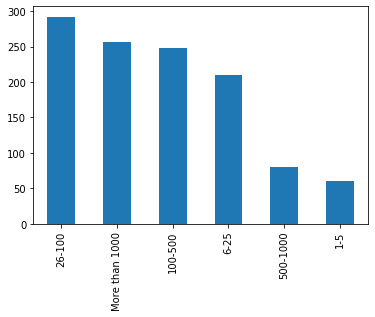

In [27]:
data['How many employees does your company or organization have?'].value_counts().plot(kind='bar')
print(data['How many employees does your company or organization have?'].value_counts())

Looks like we could investigate large companies vs small companies since the survery response from each group are comparable

1.0    248
0.0     15
Name: Is your primary role within your company related to tech/IT?, dtype: int64


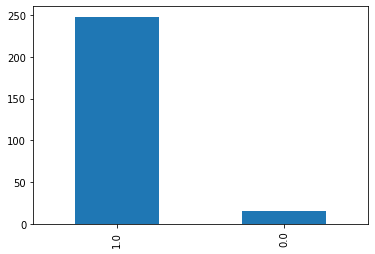

In [34]:
data['Is your primary role within your company related to tech/IT?'].value_counts().plot(kind='bar')
print(data['Is your primary role within your company related to tech/IT?'].value_counts())
#Lots of missing info in this column!!!! may need to drop

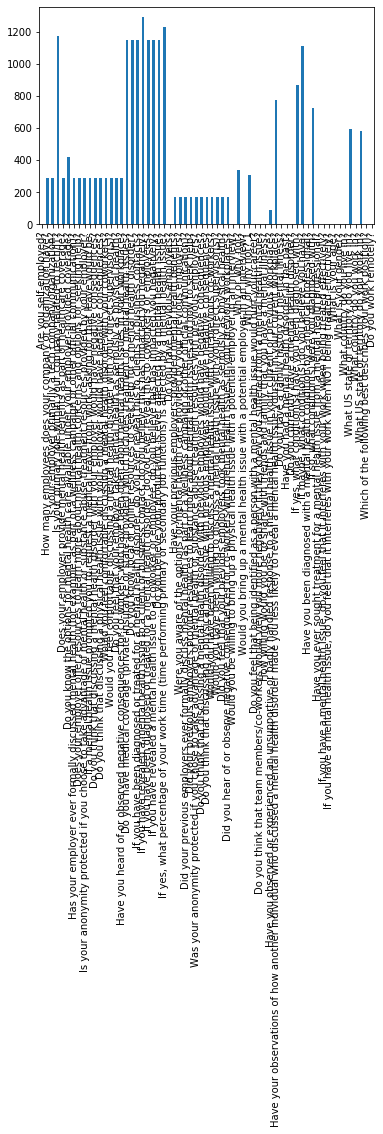

In [37]:
#Trying to see which columns have too many missing values - 
#may want to write out to a file or code column names and make plot larger
data.isna().sum().plot(kind='bar')

In [36]:
temp = data.isna().sum()
print("Column with lowest amount of missings contains {} missing values.".format(temp.min()))
print("Column with highest amount of missings contains {} missing values.".format(temp.max()))

Column with lowest amount of missings contains 0 missing values.
Column with highest amount of missings contains 1289 missing values.
